# Análisis de la evolución de la tasa de desempleo en Perú durante los últimos años, identificando diferencias según la edad y género

>Equipo: Los Miraculous

#To-do:
Análisis de estadisticas metricas, comparar resultados con otros estudios, describir lecciones aprendidas, sugerir posibles 
acciones a seguir basados en los resultados del estudio,
responder algunas preguntas sin respuesta, medidas de variabilidad:
promedios, desviación estandar, varianza, valores p. Análisis de tendencia, correlaciones entre varias variables



### Contenido

1. [Introducción](#introduccion)
1. [Fuentes de Datos](#fuentes-datos)
1. [Carga de Librerías](#carga-librerias)
1. [Carga y limpieza](#carga-historico)
2. [Análisis de tendencias](#viz)

   


# Contenido

## 1. Introducción<a name="introduccion"></a>

El desempleo es uno de los indicadores clave para evaluar la salud económica de un país. En el Perú, entender las dinámicas del desempleo es crucial para diseñar políticas efectivas que apoyen a los grupos más vulnerables. Este proyecto busca analizar la evolución de la tasa de desempleo en Perú, identificando diferencias según edad, género y nivel educativo. Utilizando datos del Banco Central de Reserva del Perú (BCRP) y el INEI, proporcionaremos una comprensión detallada de las causas subyacentes del desempleo y sus tendencias.

## 2. Fuentes de Datos<a name="fuentes-datos"></a>

- Instituto Nacional de Estadística e Informática (INEI): Datos sobre la población en edad de trabajar (PET), la población económicamente activa (PEA), y la población económicamente inactiva (PEI), así como su edad y género.
- Banco Central de Reserva del Perú (BCRP): Datos sobre la tasa de desempleo y otros indicadores económicos relevantes.


In [1]:
# Librería para podeer leer bases de datos .sav del INEI
!pip install pyreadstat

You should consider upgrading via the 'C:\Users\DHO_d\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## 3. Carga de librerías<a name="carga-librerias"></a>

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import pyreadstat

## 4. Carga y limpieza <a name="carga-historico"></a>

In [3]:
# Leemos y observamos el primer dataset

df,meta = pyreadstat.read_sav(r"EPEN BDS/2004/Epe-Personas Ene-Feb-Mar-2004.sav")
df

,PANO,PMES,CONGLOME,VIVIENDA,HOGAR,CODPERSO,DOMINIO,ESTRATO,CODPANEL,P103,...,P219,P220,P222,OCU200,I211A,I212A,D211B,INGPRIN,INGTOT,FACTOR
0,2004,01,032873,016,11,01,8.0,1.0,02101101,1.0,...,NaN,NaN,5.0,1.0,NaN,950.0,NaN,1000.0,1000.0,259.250147
1,2004,01,032873,016,11,02,8.0,1.0,02101102,2.0,...,NaN,1.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,317.282692
2,2004,01,032873,016,11,03,8.0,1.0,02101103,3.0,...,NaN,NaN,5.0,1.0,NaN,NaN,NaN,0.0,0.0,324.569805
3,2004,01,032873,016,11,04,8.0,1.0,02101104,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.134857
4,2004,01,032873,028,11,01,8.0,1.0,02101101,1.0,...,NaN,1.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,259.250147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19583,2004,03,053979,053,11,02,8.0,1.0,04031102,6.0,...,NaN,NaN,5.0,1.0,NaN,100.0,NaN,100.0,320.0,416.152424
19584,2004,03,053979,053,11,03,8.0,1.0,04031103,6.0,...,NaN,NaN,5.0,1.0,346.4,NaN,0.0,346.4,346.4,473.845262
19585,2004,03,053979,053,11,04,8.0,1.0,04031104,6.0,...,NaN,NaN,5.0,1.0,NaN,280.0,NaN,280.0,280.0,436.518840
19586,2004,03,053979,053,11,05,8.0,1.0,04031105,6.0,...,NaN,NaN,5.0,1.0,210.0,NaN,120.0,330.0,330.0,416.152424


La EPE está diseñada para proveer al país resultados mensuales sobre empleo
e ingresos de Lima Metropolitana y la Provincia Constitucional del Callao por trimestres móviles, a través
de un cuestionario corto, aplicada para la población de 14 y más años de edad. Investiga las principales
características demográficas de los miembros de los hogares, empleo (ocupación, actividad económica,
tamaño de empresa), ingresos por trabajo, desocupados (búsqueda, duración del desempleo), aseguramiento
en salud, entre otras vari

Con los resultados de la EPE, se informa al país, la situación del empleo e ingresos en Lima Metropolitana de
manera mensual. La EPE investiga mensualmente 1600 viviendas particulares y los resultados se presentan
como promedio de trimestres móvile

Entre sus objetivos generales, proveer al país información estadística continua sobre el mercado laboral
peruano con representación nacional, departamental y principales ciudades. Asimismo, proporcionar en el
corto plazo indicadores de empleo a nivel nacional.

In [4]:
# Como las EPEN están en organizadas en trimestres
# creamos una función para cargar, las 4 datasets de cada año
# y juntarlas en una sola

In [5]:
# Directorio base
base_dir = "C:\\Users\\DHO_d\\OneDrive\\Proyecto_Integrador_HP\\EPEN BDS"

# Años a procesar
years = range(2004, 2023)

# Diccionario para almacenar los DataFrames de cada año
annual_dfs = {}

# Función para procesar los archivos de cada año
def process_year(year):
    year_dir = os.path.join(base_dir, str(year))
    # Listar todos los archivos SPSS en el directorio del año
    spss_files = [f for f in os.listdir(year_dir) if f.endswith('.sav')]
    
    # Leer y concatenar todos los archivos SPSS del año
    dfs = []
    for spss_file in spss_files:
        file_path = os.path.join(year_dir, spss_file)
        df, meta = pyreadstat.read_sav(file_path)
        dfs.append(df)
    
    # Concatenar todos los dataframes del año
    year_df = pd.concat(dfs, ignore_index=True)
    
    # Guardar el dataframe en el diccionario
    annual_dfs[year] = year_df
    print(f"Procesado y almacenado en memoria: {year}")

# Procesar cada año
for year in years:
    process_year(year)
    

# Los DataFrames ahora están almacenados en el diccionario annual_dfs

Procesado y almacenado en memoria: 2004
Procesado y almacenado en memoria: 2005
Procesado y almacenado en memoria: 2006
Procesado y almacenado en memoria: 2007
Procesado y almacenado en memoria: 2008
Procesado y almacenado en memoria: 2009
Procesado y almacenado en memoria: 2010
Procesado y almacenado en memoria: 2011
Procesado y almacenado en memoria: 2012
Procesado y almacenado en memoria: 2013
Procesado y almacenado en memoria: 2014
Procesado y almacenado en memoria: 2015
Procesado y almacenado en memoria: 2016
Procesado y almacenado en memoria: 2017
Procesado y almacenado en memoria: 2018
Procesado y almacenado en memoria: 2019
Procesado y almacenado en memoria: 2020
Procesado y almacenado en memoria: 2021
Procesado y almacenado en memoria: 2022


In [6]:
# Al intentar concatear las df por año en una sola df nos encontramos con un error.

# Concatenar todos los DataFrames anuales en uno solo
all_years_df = pd.concat(annual_dfs.values(), ignore_index=True)



In [7]:
all_years_df

,PANO,PMES,CONGLOME,VIVIENDA,HOGAR,CODPERSO,DOMINIO,ESTRATO,CODPANEL,P103,...,fa_jas20,fa_ond20,fa_amj21,fa_efm21,fa_jas21,fa_ond21,fa_amj22,fa_efm22,fa_jas22,fa_nde22
0,2004,04,032873,011,11,01,8.0,1.0,04041101,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,04,032873,011,11,02,8.0,1.0,04041102,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,04,032873,011,11,03,8.0,1.0,04041103,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,04,032873,011,11,04,8.0,1.0,04041104,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,04,032873,011,11,05,8.0,1.0,04041105,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1682.162810
1208100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1208101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1188.215310
1208102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.566112


In [8]:
#El error se debe a que las df tienen columnas repetidas (es decir con el mismo label), por eso, filtraremos solo las columnas únicas.


def remove_duplicate_columns(df):
    df.columns = df.columns.str.lower()
    df = df.loc[:, ~df.columns.duplicated()]
     
    return df

# Eliminar columnas duplicadas en cada DataFrame anual
for year, df in annual_dfs.items():
    annual_dfs[year] = remove_duplicate_columns(df)
    annual_dfs[year]['año'] = year
    


C:\Users\DHO_d\AppData\Local\Temp\ipykernel_24868\2782233050.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_dfs[year]['año'] = year
C:\Users\DHO_d\AppData\Local\Temp\ipykernel_24868\2782233050.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_dfs[year]['año'] = year
C:\Users\DHO_d\AppData\Local\Temp\ipykernel_24868\2782233050.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [9]:

# Concatenar todos los DataFrames anuales en uno solo
all_years_df = pd.concat(annual_dfs.values(), ignore_index=True)



In [10]:
all_years_df

,pano,pmes,conglome,vivienda,hogar,codperso,dominio,estrato,codpanel,p103,...,fa_jas20,fa_ond20,fa_amj21,fa_efm21,fa_jas21,fa_ond21,fa_amj22,fa_efm22,fa_jas22,fa_nde22
0,2004,04,032873,011,11,01,8.0,1.0,04041101,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,04,032873,011,11,02,8.0,1.0,04041102,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,04,032873,011,11,03,8.0,1.0,04041103,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,04,032873,011,11,04,8.0,1.0,04041104,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,04,032873,011,11,05,8.0,1.0,04041105,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208099,2022,01,019915,0096,22,02,8.0,1.0,22012202,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1682.162810
1208100,2022,01,019915,0096,22,03,8.0,1.0,22012203,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1208101,2022,01,019915,0117,11,01,8.0,1.0,22011101,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1188.215310
1208102,2022,01,019915,0117,11,02,8.0,1.0,22011102,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.566112


## 5. Análisis de tendencias<a name="viz"></a>

En el apartado de análisis de tendencias, se utilizarán diferentes métodos para examinar y comprender la evolución de la tasa de desempleo en Perú a lo largo de los años. 

En primer lugar, se calculará la Tasa de Desocupación Abierta (TDA) utilizando la fórmula de desempleo dividido por la población económicamente activa. Esto nos permitirá obtener una medida de la proporción de personas desempleadas en relación con la población activa.

Luego, se realizará un análisis de tendencias utilizando gráficos de línea para visualizar la evolución de la TDA a lo largo del tiempo. Esto nos ayudará a identificar patrones y cambios significativos en la tasa de desempleo a lo largo de los años.

Además, se realizará un análisis de la tasa de actividad según el género, comparando la TDA para hombres y mujeres. Esto nos permitirá identificar posibles diferencias en la participación laboral entre ambos géneros.

Por último, se analizará la relación entre el nivel educativo de la población económicamente activa y la tasa de desempleo. Esto nos ayudará a comprender cómo el nivel educativo puede influir en las oportunidades laborales y la tasa de desempleo.


In [11]:

# Renombramos los códigos con su significado, según el diccionario del EPEN, INEI.

all_years_df.rename(columns={'p109a':'nivel', 'ocu200':'ocupacion', 'p107':'gender','p108':'edad'}, inplace=True)


# Filtramos solo las columnas que nos son de utilidad
all_years_df2 = all_years_df[['año','nivel', 'ocupacion','gender','edad']]
all_years_df2


,año,nivel,ocupacion,gender,edad
0,2004,5.0,1.0,1.0,51.0
1,2004,5.0,4.0,2.0,49.0
2,2004,3.0,1.0,1.0,19.0
3,2004,5.0,1.0,2.0,18.0
4,2004,5.0,3.0,1.0,16.0
...,...,...,...,...,...
1208099,2022,6.0,2.0,2.0,25.0
1208100,2022,NaN,NaN,1.0,1.0
1208101,2022,6.0,4.0,2.0,54.0
1208102,2022,5.0,4.0,2.0,15.0


In [12]:
all_years_df2['ocupacion'].value_counts()

ocupacion
1.0    502364
4.0    263174
2.0     40698
0.0     32417
3.0     12621
Name: count, dtype: int64

In [13]:

def calculate_tda(df):
    # dividir a la población desempleada abierta entre la Población Económicamente Activa (PEA) y el resultado multiplicarlo por cien
    # ocupacion = 1: ocupado, ocupacion = 2: desocupado abierto
    
    tda = (df['ocupacion'] == 2).sum() / ((df['ocupacion'] == 1).sum() + (df['ocupacion'] == 2).sum()) * 100
    
    if tda!=0:
        return tda
    else:
        return 0

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_tda(group):
    """
    Calcular la tasa de desocupación abierta (TDA) para un grupo dado.
    - ocupacion = 1: ocupado
    - ocupacion = 2: desocupado abierto
    """
    ocupados = (group['ocupacion'] == 1).sum()
    desocupados = (group['ocupacion'] == 2).sum()
    pea = ocupados + desocupados
    
    if pea == 0:
        return 0
    tda = (desocupados / pea) * 100
    return tda

def graf_nivel(df):
    niveles = {
        1: 'Sin Nivel',
        2: 'Primaria',
        6: 'Secundaria',
        9: 'Superior'
    }
    colors = ['teal', 'blue', 'violet', 'magenta']
    plt.figure(figsize=(12, 6))
    
    for i, (nivel, label) in enumerate(niveles.items()):
        tda = df[df['nivel'] == nivel].groupby('año').apply(calculate_tda)
        tda = pd.DataFrame(tda, columns=['tda'])
        tda.reset_index(inplace=True)
        plt.plot(tda['año'], tda['tda'], marker='o', color=colors[i], label=label)
    
    plt.title('Tasa de desocupación abierta (TDA) en Lima por nivel educativo (2004-2022)')
    plt.xlabel('Año')
    plt.ylabel('TDA (%)')
    plt.grid(True)
    plt.xticks(ticks=tda['año'].unique())
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Ejemplo de uso:
# Asumimos que 'df' es tu DataFrame que contiene las columnas 'ocupacion', 'nivel' y 'año'
# df = pd.read_csv('tu_archivo.csv')  # Cargar tus datos
# graf_nivel(df)


In [15]:
# La tda es la tasa de desocupación abierta, que se calcula como el número de desocupados abiertos (2) dividido por la población económicamente 
# activa (ocupados (1) + desocupados abiertos(2)) multiplicado por 100.)

# Primero hallemos la TDA por año y la almacenamos en una nueva df 



tda = all_years_df2.groupby('año').apply(calculate_tda).reset_index(name='tda')
tda

,año,tda
0,2004,9.556302
1,2005,9.908238
2,2006,8.711178
3,2007,8.365534
4,2008,8.331982
5,2009,8.044280
6,2010,7.423779
7,2011,7.606232
8,2012,6.401717
9,2013,5.429331


# PLOTS

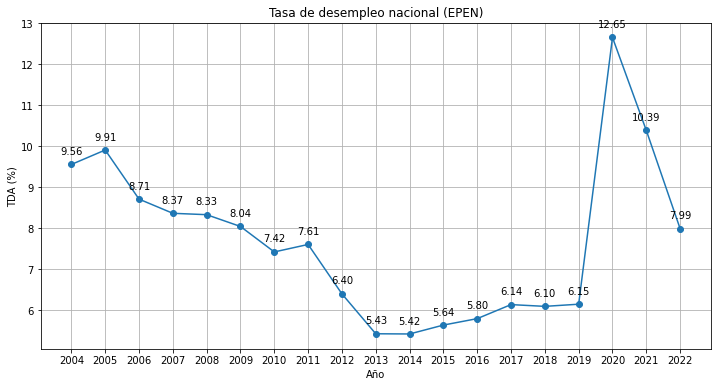

In [16]:
# Hacemos un grafico de linea para ver la evolución de la TDA en el tiempo
plt.figure(figsize=(12, 6))
plt.plot(tda['año'], tda['tda'], marker='o')
plt.title('Tasa de desempleo nacional (EPEN)')
plt.xlabel('Año')
plt.ylabel('TDA (%)')
plt.grid()
plt.xticks(ticks=tda['año'])

for i, txt in enumerate(tda['tda']):
    plt.annotate(f"{txt:.2f}", (tda['año'][i], tda['tda'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [17]:
# Función para calcular la TDA


# Función para graficar la TDA
def plot_tda(df, title):

    plt.figure(figsize=(12, 6))
    plt.plot(df['año'], df['tda'], marker='o')
    plt.title(title)
    plt.xlabel('Año')
    plt.ylabel('TDA (%)')
    plt.grid()
    plt.xticks(ticks=df['año'])
    plt.show()



### 5.1 Tasa de actividad según género


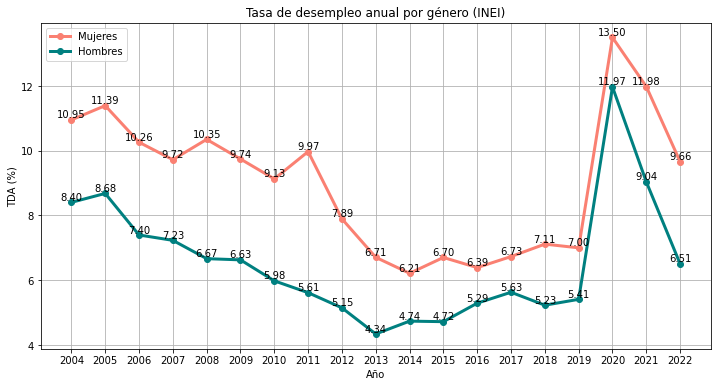

<Figure size 432x288 with 0 Axes>

In [18]:
def plot_gender(df):
    # Aplicamos la función calculate_tda a cada grupo de mujeres por año
    # Filtramos solo las mujeres

    tda_m = df[df['gender']==2].groupby('año').apply(calculate_tda)
    # Convertimos la serie en un DataFrame
    tda_m = pd.DataFrame(tda_m, columns=['tda'])
    # Reseteamos el índice para que el año sea una columna
    tda_m.reset_index(inplace=True)

    # Filtramos solo los hombres (gender=1)

    # Aplicamos lo mismo para los hombres
    tda_h = df[df['gender']==1].groupby('año').apply(calculate_tda)
    tda_h= pd.DataFrame(tda_h, columns=['tda'])
    tda_h.reset_index(inplace=True)

    # Graficamos la TDA por género
    plt.figure(figsize=(12, 6))

    plt.plot(tda_m['año'], tda_m['tda'], marker='o', label='Mujeres', color='salmon', lw=3)

    plt.plot(tda_h['año'], tda_h['tda'], marker='o', label='Hombres', color='teal',lw=3)
    plt.title('Tasa de desempleo anual por género (INEI)')
    plt.xlabel('Año')
    plt.ylabel('TDA (%)')

    # Agregar etiquetas con el valor de la TDA
    for i, row in tda_m.iterrows():
        # Agregar el valor de la TDA en cada punto
        # ha='center': alineación horizontal centrada
        # va='bottom': alineación vertical abajo
        # f"{row['tda']:.2f}": formato de número con dos decimales
        # plt.text(x, y, texto, ha='center', va='bottom')
        plt.text(row['año'], row['tda'], f"{row['tda']:.2f}", ha='center', va='bottom')
    for i, row in tda_h.iterrows():
        plt.text(row['año'], row['tda'], f"{row['tda']:.2f}", ha='center', va='bottom')



    plt.grid()
    # Mostrar los años en el eje x
    plt.xticks(ticks=tda_m['año'])
    plt.legend()
    plt.show()
    plt.savefig('a.png')
plot_gender(all_years_df2)

Existe mayor participación de los hombres en la fuerza de trabajo; así en el año 2022, el 93,49% de los
hombres en edad de trabajar participaban en la fuerza de trabajo, siendo 3,15 puntos porcentuales más que
las mujeres (90,34%). 

En la pandemia, el 89,3% de los hombres en edad de trabajar participa del mercado
de trabajo, siendo 2,8 puntos porcentuales más que las mujeres (86,5).

El 2013 fue el año con menor TDA para los hombres (4.34), y el 2014 para las mujeres (6.21) 

En tanto con respecto a los otros años, la brecha
de género es en promedio de 3,3 puntos porcentuales.

### 5.2 Niveles de empleo según nivel educativo de la PEA


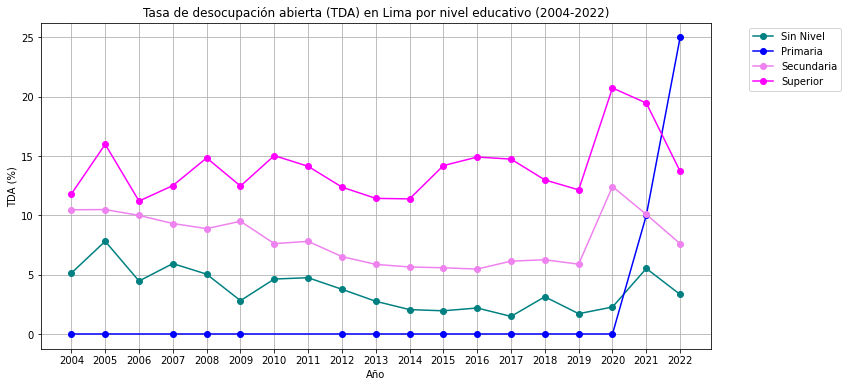

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_tda(group):
    """
    Calcular la tasa de desocupación abierta (TDA) para un grupo dado.
    - ocupacion = 1: ocupado
    - ocupacion = 2: desocupado abierto
    """
    ocupados = (group['ocupacion'] == 1).sum()
    desocupados = (group['ocupacion'] == 2).sum()
    pea = ocupados + desocupados
    
    if pea == 0:
        return 0
    tda = (desocupados / pea) * 100
    return tda

def graf_nivel(df):
    niveles = {
        1: 'Sin Nivel',
        2: 'Primaria',
        6: 'Secundaria',
        9: 'Superior'
    }
    colors = ['teal', 'blue', 'violet', 'magenta']
    plt.figure(figsize=(12, 6))
    
    for i, (nivel, label) in enumerate(niveles.items()):
        tda = df[df['nivel'] == nivel].groupby('año').apply(calculate_tda)
        tda = pd.DataFrame(tda, columns=['tda'])
        tda.reset_index(inplace=True)
        plt.plot(tda['año'], tda['tda'], marker='o', color=colors[i], label=label)
    
    plt.title('Tasa de desocupación abierta (TDA) en Lima por nivel educativo (2004-2022)')
    plt.xlabel('Año')
    plt.ylabel('TDA (%)')
    plt.grid(True)
    plt.xticks(ticks=tda['año'].unique())
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Ejemplo de uso:
# Asumimos que 'df' es tu DataFrame que contiene las columnas 'ocupacion', 'nivel' y 'año'
# df = pd.read_csv('tu_archivo.csv')  # Cargar tus datos
# graf_nivel(df)
graf_nivel(all_years_df2)

Para categorizar por nivel educativo, aplicaremos el mismo procedimiento anterior, pero agrupando por la columna 'nivel'

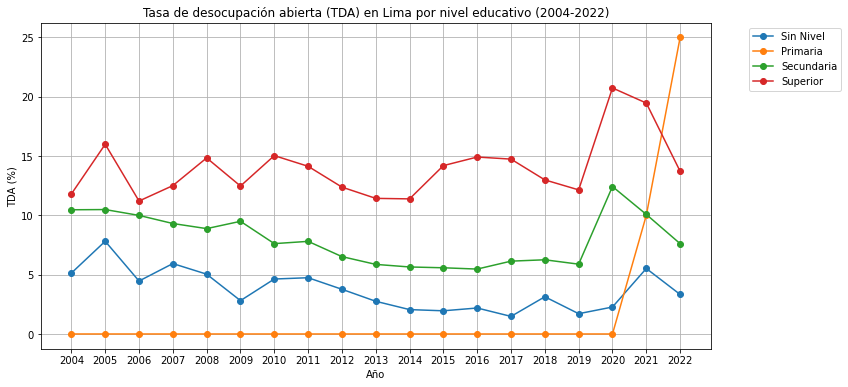

In [19]:


def graf_nivel(df):
    niveles = {
        1: 'Sin Nivel',
        2: 'Primaria',
        6: 'Secundaria',
        9: 'Superior'
    }
    colors = ['teal','blue','violet','magenta']
    plt.figure(figsize=(12, 6))
    for i in niveles.keys():
        
        
        tda = df[df['nivel']==i].groupby('año').apply(calculate_tda)
        tda = pd.DataFrame(tda, columns=['tda'])
        tda.reset_index(inplace=True)
        plt.plot(tda['año'], tda['tda'], marker='o', label=niveles[i])
    
    plt.title('Tasa de desocupación abierta (TDA) en Lima por nivel educativo (2004-2022)')
    plt.xlabel('Año')
    plt.ylabel('TDA (%)')
    plt.grid()
    plt.xticks(ticks=tda['año'])
    plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

graf_nivel(all_years_df2)


In [42]:
def calculate_tda(group):
    ocupados = (group['ocupacion'] == 1).sum()
    desocupados = (group['ocupacion'] == 2).sum()
    pea = ocupados + desocupados
    
    if pea == 0:
        return 0
    tda = (desocupados / pea) * 100
    return tda
    

In [49]:
all_years_df2

,año,nivel,ocupacion,gender,edad,niveledu,estado,tda
0,2004,5.0,1.0,1.0,51.0,Hasta Secundaria,Empleados,NaN
1,2004,3.0,1.0,1.0,19.0,Hasta Secundaria,Empleados,NaN
2,2004,5.0,1.0,2.0,18.0,Hasta Secundaria,Empleados,NaN
3,2004,3.0,1.0,1.0,50.0,Hasta Secundaria,Empleados,NaN
4,2004,6.0,1.0,1.0,25.0,Hasta Secundaria,Empleados,NaN
...,...,...,...,...,...,...,...,...
543057,2022,10.0,1.0,1.0,57.0,Superior,Empleados,NaN
543058,2022,6.0,1.0,2.0,57.0,Hasta Secundaria,Empleados,NaN
543059,2022,7.0,1.0,1.0,28.0,Superior,Empleados,NaN
543060,2022,6.0,2.0,2.0,25.0,Hasta Secundaria,Desempleados,NaN


In [67]:
import pandas as pd
import matplotlib.pyplot as plt


def graf_nivel(df):
    niveles = {
        1: 'Sin Nivel',
        2: 'Primaria',
        6: 'Secundaria',
        9: 'Superior'
    }
    # Ordered list of colors
    colors = ['#00BFFF', '#99999F', '#6498ED', '#4682B4']
    data = []

    # Calculate TDA for each level and year
    for nivel in sorted(niveles.keys()):
        tda = df[df['nivel'] == nivel].groupby('año').apply(calculate_tda)
        data.append(tda)

    # Create a DataFrame with the TDA values for each level
    tda_df = pd.DataFrame(data).T
    tda_df.columns = [niveles[n] for n in sorted(niveles.keys())]

    # Plotting the stacked bar plot
    ax = tda_df.plot(kind='line', color=colors, figsize=(12, 6))

    plt.title('Tasa de desocupación abierta (TDA) en Lima por nivel educativo (2004-2022)')
    plt.xlabel('Año')
    plt.ylabel('TDA (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

# Assuming all_years_df2 is your DataFrame
graf_nivel(all_years_df2)


C:\Users\DHO_d\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\construction.py:575: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


TypeError: no numeric data to plot

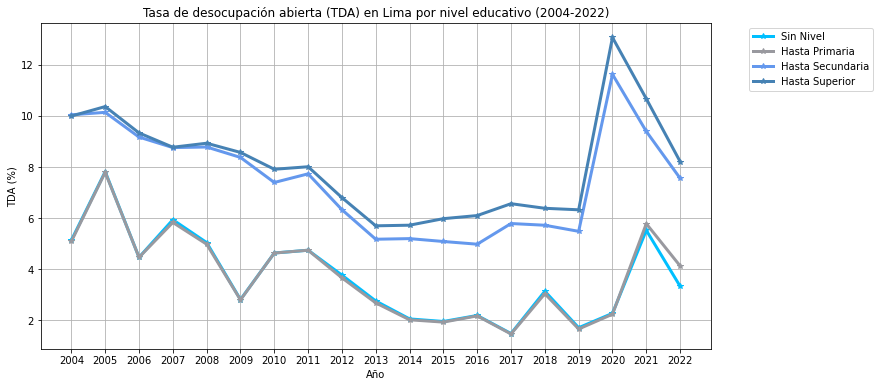

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_tda(group):
    """
    Calcular la tasa de desocupación abierta (TDA) para un grupo dado.
    - ocupacion = 1: ocupado
    - ocupacion = 2: desocupado abierto
    """
    ocupados = (group['ocupacion'] == 1).sum()
    desocupados = (group['ocupacion'] == 2).sum()
    pea = ocupados + desocupados
    
    if pea == 0:
        return pd.Series({'tda': 0, 'ocupados': 0, 'desocupados': 0})
    tda = (desocupados / pea) * 100
    return pd.Series({'tda': tda, 'ocupados': ocupados, 'desocupados': desocupados})

def graf_nivel(df):
    niveles = {
        1: 'Sin Nivel',
        2: 'Hasta Primaria',
        6: 'Hasta Secundaria',
        9: 'Hasta Superior'
    }
    colors = ['#00BFFF', '#99999F', '#6498ED', '#4682B4']

    plt.figure(figsize=(12, 6))

    for i, (nivel, label) in enumerate(niveles.items()):
        

        tda = df[(df['nivel'] <= nivel) ].groupby('año').apply(calculate_tda)
        tda.reset_index(inplace=True)

        plt.plot(tda['año'], tda['tda'], color=colors[i], lw=3, marker='*', label=label)

      
    plt.title('Tasa de desocupación abierta (TDA) en Lima por nivel educativo (2004-2022)')
    plt.xlabel('Año')
    plt.ylabel('TDA (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.xticks(ticks=tda['año'].unique())
    plt.show()

# Asumiendo que all_years_df2 es tu DataFrame
# Llamar a la función para graficar
graf_nivel(all_years_df2)


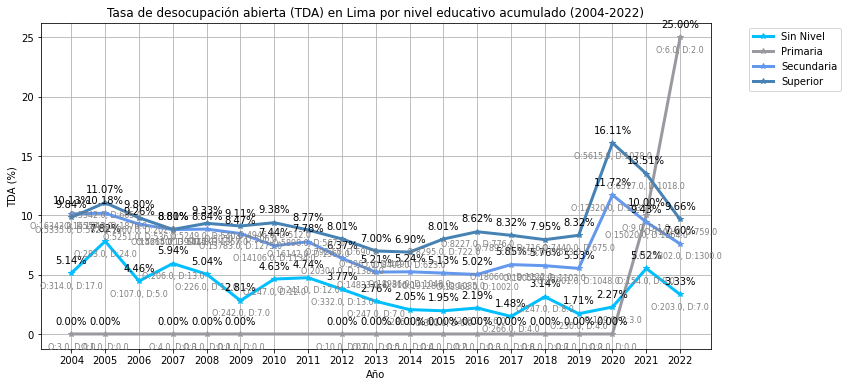

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_tda(group):
    """
    Calcular la tasa de desocupación abierta (TDA) para un grupo dado.
    - ocupacion = 1: ocupado
    - ocupacion = 2: desocupado abierto
    """
    ocupados = (group['ocupacion'] == 1).sum()
    desocupados = (group['ocupacion'] == 2).sum()
    pea = ocupados + desocupados
    
    if pea == 0:
        return pd.Series({'tda': 0, 'ocupados': 0, 'desocupados': 0})
    tda = (desocupados / pea) * 100
    return pd.Series({'tda': tda, 'ocupados': ocupados, 'desocupados': desocupados})

def graf_nivel_acumulado(df):
    niveles = {
        1: 'Sin Nivel',
        2: 'Primaria',
        6: 'Secundaria',
        9: 'Superior'
    }
    colors = ['#00BFFF', '#99999F', '#6498ED', '#4682B4']
    niveles_ordenados = sorted(niveles.keys())
    
    plt.figure(figsize=(12, 6))

    for i in range(len(niveles_ordenados)):
        nivel = niveles_ordenados[i]
        nivel_anterior = niveles_ordenados[i - 1] if i > 0 else 0
        df_filtrado = df[(df['nivel'] <= nivel) & (df['nivel'] > nivel_anterior)]
        tda = df_filtrado.groupby('año').apply(calculate_tda)
        tda.reset_index(inplace=True)

        plt.plot(tda['año'], tda['tda'], color=colors[i], lw=3, marker='*', label=niveles[nivel])

        for j in range(len(tda)):
            plt.annotate(f"{tda['tda'][j]:.2f}%", (tda['año'][j], tda['tda'][j]), textcoords="offset points", xytext=(0,10), ha='center')
            plt.annotate(f"O:{tda['ocupados'][j]}, D:{tda['desocupados'][j]}", (tda['año'][j], tda['tda'][j]), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8, color='grey')
    
    plt.title('Tasa de desocupación abierta (TDA) en Lima por nivel educativo acumulado (2004-2022)')
    plt.xlabel('Año')
    plt.ylabel('TDA (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.xticks(ticks=tda['año'].unique())
    plt.show()

# Asumiendo que all_years_df2 es tu DataFrame
# Llamar a la función para graficar
graf_nivel_acumulado(all_years_df2)


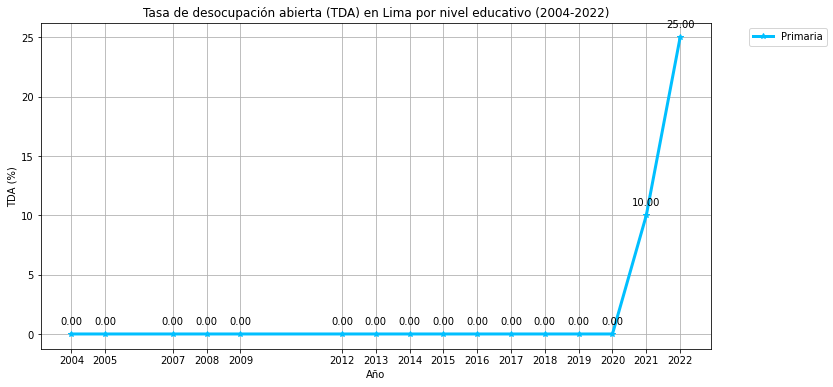

In [76]:
df=all_years_df2[(all_years_df2['nivel']<=2)].groupby('año')

In [77]:
df.apply(calculate_tda)

,tda,ocupados,desocupados
año,,,
2004,5.089820,317.0,17.0
2005,7.792208,284.0,24.0
2006,4.464286,107.0,5.0
2007,5.829596,210.0,13.0
2008,4.979253,229.0,12.0
2009,2.800000,243.0,7.0
2010,4.633205,247.0,12.0
2011,4.743083,241.0,12.0
2012,3.661972,342.0,13.0


In [21]:
def clas_nivel(nivel):

    if nivel<= 1:
        return 'Sin Nivel'
    elif nivel <= 2:
        return 'Hasta Primaria'
    elif nivel <= 6:
        return 'Hasta Secundaria'
    else:
        return 'Superior'

all_years_df2['niveledu']=all_years_df2['nivel'].apply(clas_nivel)

C:\Users\DHO_d\AppData\Local\Temp\ipykernel_24868\876735424.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_df2['niveledu']=all_years_df2['nivel'].apply(clas_nivel)


In [22]:
all_years_df2=all_years_df2[(all_years_df2['ocupacion']==1) |(all_years_df2['ocupacion']==2)]

In [23]:
def clas_ocupacion(ocupacion):

    if ocupacion== 1:
        return 'Empleados'
    else:
        return 'Desempleados'


all_years_df2['estado']=all_years_df2['ocupacion'].apply(clas_ocupacion)

C:\Users\DHO_d\AppData\Local\Temp\ipykernel_24868\877656006.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_df2['estado']=all_years_df2['ocupacion'].apply(clas_ocupacion)


In [24]:
all_years_df2.reset_index(drop=True,inplace=True)

In [25]:
all_years_df2[(all_years_df2['niveledu']=='Hasta Primaria') & (all_years_df2['ocupacion']==2)]

,año,nivel,ocupacion,gender,edad,niveledu,estado
485300,2021,2.0,2.0,1.0,49.0,Hasta Primaria,Desempleados
514329,2022,2.0,2.0,1.0,54.0,Hasta Primaria,Desempleados
524030,2022,2.0,2.0,2.0,27.0,Hasta Primaria,Desempleados


In [26]:
all_years_df2[(all_years_df2['niveledu']=='Hasta Primaria') & (all_years_df2['ocupacion']==1)]

,año,nivel,ocupacion,gender,edad,niveledu,estado
6319,2004,2.0,1.0,2.0,38.0,Hasta Primaria,Empleados
13974,2004,2.0,1.0,2.0,59.0,Hasta Primaria,Empleados
23613,2004,2.0,1.0,2.0,63.0,Hasta Primaria,Empleados
39950,2005,2.0,1.0,2.0,65.0,Hasta Primaria,Empleados
66256,2007,2.0,1.0,1.0,51.0,Hasta Primaria,Empleados
...,...,...,...,...,...,...,...
526625,2022,2.0,1.0,2.0,70.0,Hasta Primaria,Empleados
531304,2022,2.0,1.0,2.0,54.0,Hasta Primaria,Empleados
531956,2022,2.0,1.0,2.0,44.0,Hasta Primaria,Empleados
536086,2022,2.0,1.0,2.0,48.0,Hasta Primaria,Empleados


In [27]:
all_years_df2[(all_years_df2['niveledu']=='Sin Nivel') & (all_years_df2['ocupacion']==2)]

,año,nivel,ocupacion,gender,edad,niveledu,estado
856,2004,1.0,2.0,1.0,63.0,Sin Nivel,Desempleados
2255,2004,1.0,2.0,1.0,24.0,Sin Nivel,Desempleados
2292,2004,1.0,2.0,2.0,36.0,Sin Nivel,Desempleados
7438,2004,1.0,2.0,1.0,68.0,Sin Nivel,Desempleados
7689,2004,1.0,2.0,2.0,46.0,Sin Nivel,Desempleados
...,...,...,...,...,...,...,...
518164,2022,1.0,2.0,2.0,68.0,Sin Nivel,Desempleados
523107,2022,1.0,2.0,2.0,70.0,Sin Nivel,Desempleados
525533,2022,1.0,2.0,2.0,82.0,Sin Nivel,Desempleados
528091,2022,1.0,2.0,1.0,52.0,Sin Nivel,Desempleados


In [28]:
stacky = all_years_df2.groupby(['año', 'estado']).size().unstack(fill_value=0)

In [96]:
stack = all_years_df2.groupby(['niveledu', 'estado']).size().unstack(fill_value=0)

In [95]:
stack

niveledu          estado      
Hasta Primaria    Desempleados         3
                  Empleados           75
Hasta Secundaria  Desempleados     23852
                  Empleados       300164
Sin Nivel         Desempleados       175
                  Empleados         4529
Superior          Desempleados     16668
                  Empleados       197596
dtype: int64

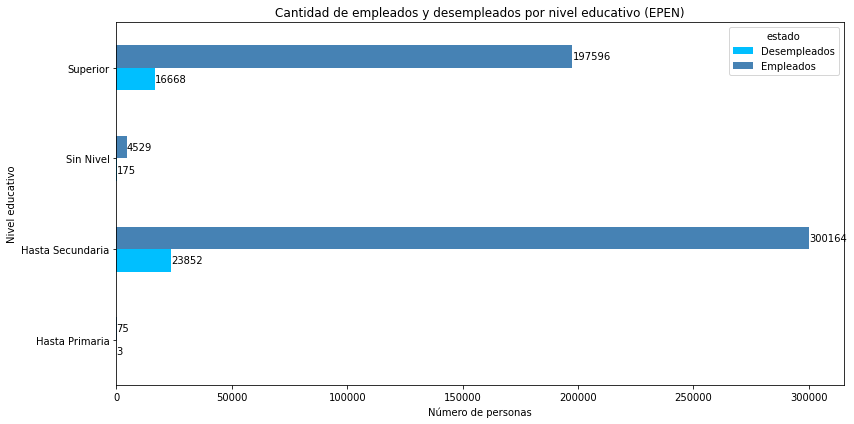

In [97]:
ax=stack.plot(kind='barh', stacked=False, figsize=(12, 6), color=['#00BFFF', '#4682B4'])

plt.xlabel('Número de personas')
plt.ylabel('Nivel educativo')
plt.title('Cantidad de empleados y desempleados por nivel educativo (EPEN)')
for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()

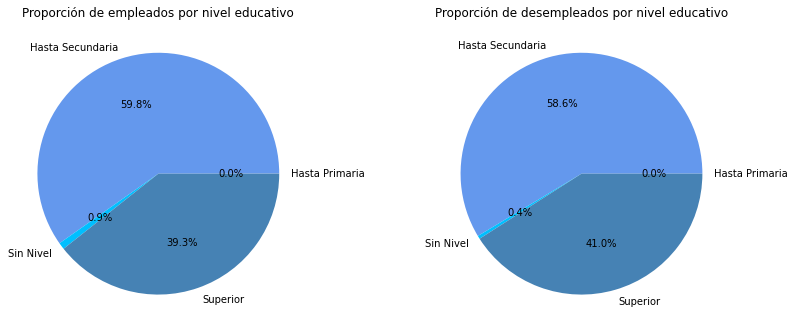

In [32]:
plt.figure(figsize=(13, 6))

# Subplot para empleados
plt.subplot(1, 2, 1)
plt.pie(stack['Empleados'], autopct='%1.1f%%', labels=stack.index, colors = ['#99999F','#6498ED','#00BFFF',  '#4682B4'] )
plt.ylabel('')
plt.title('Proporción de empleados por nivel educativo')

# Subplot para desempleados
plt.subplot(1, 2, 2)
stack['Desempleados'].plot(kind='pie', autopct='%1.1f%%',colors = ['#99999F','#6498ED','#00BFFF',  '#4682B4'])
plt.ylabel('')
plt.title('Proporción de desempleados por nivel educativo')
plt.subplots_adjust(wspace=0.4)  
plt.show()



### 5.3 Tasa de actividad según grandes grupos de edad


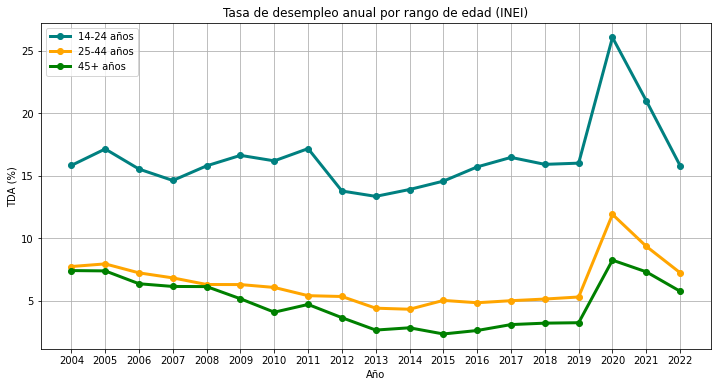

In [33]:
# Función para procesar los grupos de edad
def process_age_groups(df):
    tda24 = df[(df['edad']>=14) &(df['edad']<=24)].groupby('año').apply(calculate_tda)
    tda44 = df[(df['edad']>=25) &(df['edad']<=44)].groupby('año').apply(calculate_tda)
    tda45 = df[(df['edad']>=45)].groupby('año').apply(calculate_tda)

    tda24 = pd.DataFrame(tda24, columns=['tda'])
    tda24.reset_index(inplace=True)

    tda44 = pd.DataFrame(tda44, columns=['tda'])
    tda44.reset_index(inplace=True)

    tda45 = pd.DataFrame(tda45, columns=['tda'])
    tda45.reset_index(inplace=True)

    plt.figure(figsize=(12, 6))
    plt.plot(tda24['año'], tda24['tda'], marker='o', label='14-24 años', color='teal', lw=3)
    plt.plot(tda44['año'], tda44['tda'], marker='o', label='25-44 años', color='orange', lw=3)
    plt.plot(tda45['año'], tda45['tda'], marker='o', label='45+ años', color='green',lw=3)
    plt.title('Tasa de desempleo anual por rango de edad (INEI)')
    plt.xlabel('Año')
    plt.ylabel('TDA (%)')
    plt.grid()
    plt.xticks(ticks=tda24['año'])
    plt.legend()
    plt.show()
process_age_groups(all_years_df2)

    

La actividad laboral de los jóvenes (14 a 24 años) refleja la disponibilidad de oportunidades educativas. En el
país, el 50,5% de los jóvenes integran la fuerza de trabajo, siendo esta proporción más elevada con 67,2%
en el área rural, que en el área urbana, 47,1%. En el grupo de edad de 25 a 44 años de edad, el 85,6%
participa en la fuerza de trabajo, en el área rural el 91,4% y en el área urbana el 84,5%. La población de 45
a más años de edad, presentan una tasa de actividad de 69,4%, en el área rural es 85,0% y en área urbana
de 66,1%.

# MÉTRICAS

In [34]:


tda24 = all_years_df2[(all_years_df2['edad']>=14) &(all_years_df2['edad']<=24)].groupby('año').apply(calculate_tda)
tda44 = all_years_df2[(all_years_df2['edad']>=25) &(all_years_df2['edad']<=44)].groupby('año').apply(calculate_tda)
tda45 = all_years_df2[(all_years_df2['edad']>=45)].groupby('año').apply(calculate_tda)

tda24 = pd.DataFrame(tda24, columns=['tda'])
tda24.reset_index(inplace=True)

tda44 = pd.DataFrame(tda44, columns=['tda'])
tda44.reset_index(inplace=True)

tda45 = pd.DataFrame(tda45, columns=['tda'])
tda45.reset_index(inplace=True)


# Ahora calculamos metricas para cada grupo de 
def calculate_metrics(df):
    # TDA promedio
    tda_avg = df['tda'].mean()
    # TDA mínimo
    tda_min = df['tda'].min()
    # TDA máximo
    tda_max = df['tda'].max()
    # Año con TDA mínimo
    tda_min_year = df.loc[df['tda'].idxmin()]['año']
    # Año con TDA máximo
    tda_max_year = df.loc[df['tda'].idxmax()]['año']
    # Año con TDA promedio
    tda_avg_year = df.loc[(df['tda'] - tda_avg).abs().idxmin()]['año']
    # Desviación estándar de la TDA
    tda_std = df['tda'].std()
    
    return {
        'tda_avg': tda_avg,
        'tda_min': tda_min,
        'tda_max': tda_max,
        'tda_min_year': tda_min_year,
        'tda_max_year': tda_max_year,
        'tda_avg_year': tda_avg_year,
        'tda_std': tda_std
    }

# Calcular métricas para cada grupo de edad
tda24_metrics = calculate_metrics(tda24)
tda44_metrics = calculate_metrics(tda44)
tda45_metrics = calculate_metrics(tda45)
def show_metrics(tda, title):
    print('Métricas para el grupo de', title, 'años:')
    print(tda)
    print()

show_metrics(tda24_metrics, '14-24')
show_metrics(tda44_metrics, '25-44')
show_metrics(tda45_metrics, '45+')


Métricas para el grupo de 14-24 años:
{'tda_avg': 16.395847853938307, 'tda_min': 13.352447266024987, 'tda_max': 26.07023840041015, 'tda_min_year': 2013.0, 'tda_max_year': 2020.0, 'tda_avg_year': 2017.0, 'tda_std': 2.8627785170771434}

Métricas para el grupo de 25-44 años:
{'tda_avg': 6.40167671921352, 'tda_min': 4.3171013747912115, 'tda_max': 11.909162925798785, 'tda_min_year': 2014.0, 'tda_max_year': 2020.0, 'tda_avg_year': 2008.0, 'tda_std': 1.893212923734764}

Métricas para el grupo de 45+ años:
{'tda_avg': 4.856738570080382, 'tda_min': 2.337142009200178, 'tda_max': 8.246388443017656, 'tda_min_year': 2015.0, 'tda_max_year': 2020.0, 'tda_avg_year': 2011.0, 'tda_std': 1.940428744609209}



## Conclusiones

En este análisis de la tasa de desocupación abierta en Lima a lo largo de los años, se pueden destacar las siguientes conclusiones:

1. La tasa de desocupación abierta ha experimentado variaciones a lo largo del tiempo, mostrando diferentes tendencias y patrones. Es importante realizar un seguimiento continuo de esta tasa para comprender la evolución del mercado laboral.

2. Existe una brecha de género en la participación laboral y la tasa de desempleo. Los hombres tienden a tener una mayor participación en la fuerza laboral y una tasa de desempleo ligeramente más baja en comparación con las mujeres.

3. El nivel educativo tiene un impacto en la tasa de desempleo. Aquellos con educación universitaria o superior no universitaria tienden a tener una tasa de desempleo más baja en comparación con aquellos con niveles educativos más bajos.

4. La edad también juega un papel importante en la tasa de desempleo. Los jóvenes (14-24 años) y las personas mayores (45+ años) tienden a tener tasas de desempleo más altas en comparación con el grupo de edad de 25-44 años.

Estas conclusiones nos brindan información valiosa sobre el mercado laboral en Lima y nos ayudan a comprender mejor los factores que influyen en la tasa de desempleo. Es importante utilizar estos hallazgos para informar políticas y estrategias que promuevan un mercado laboral más inclusivo y equitativo.